___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("Train dataset has " , len(x_train) , "images")
print("Test dataset has " , len(x_test) , "images")

Train dataset has  60000 images
Test dataset has  10000 images


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

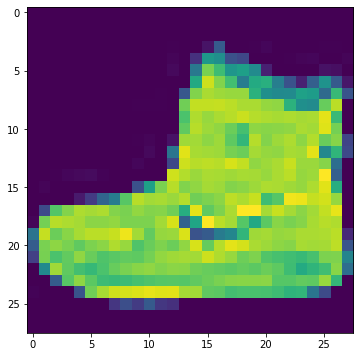

In [7]:
plt.imshow(x_train[0]);

In [8]:
print("y_train dataset")
print(y_train)
print("\ny_train unique values")
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

y_train dataset
[9 0 0 ... 3 0 5]

y_train unique values
[[   0    1    2    3    4    5    6    7    8    9]
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]]


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
df_y = pd.DataFrame(y_train)
df_y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

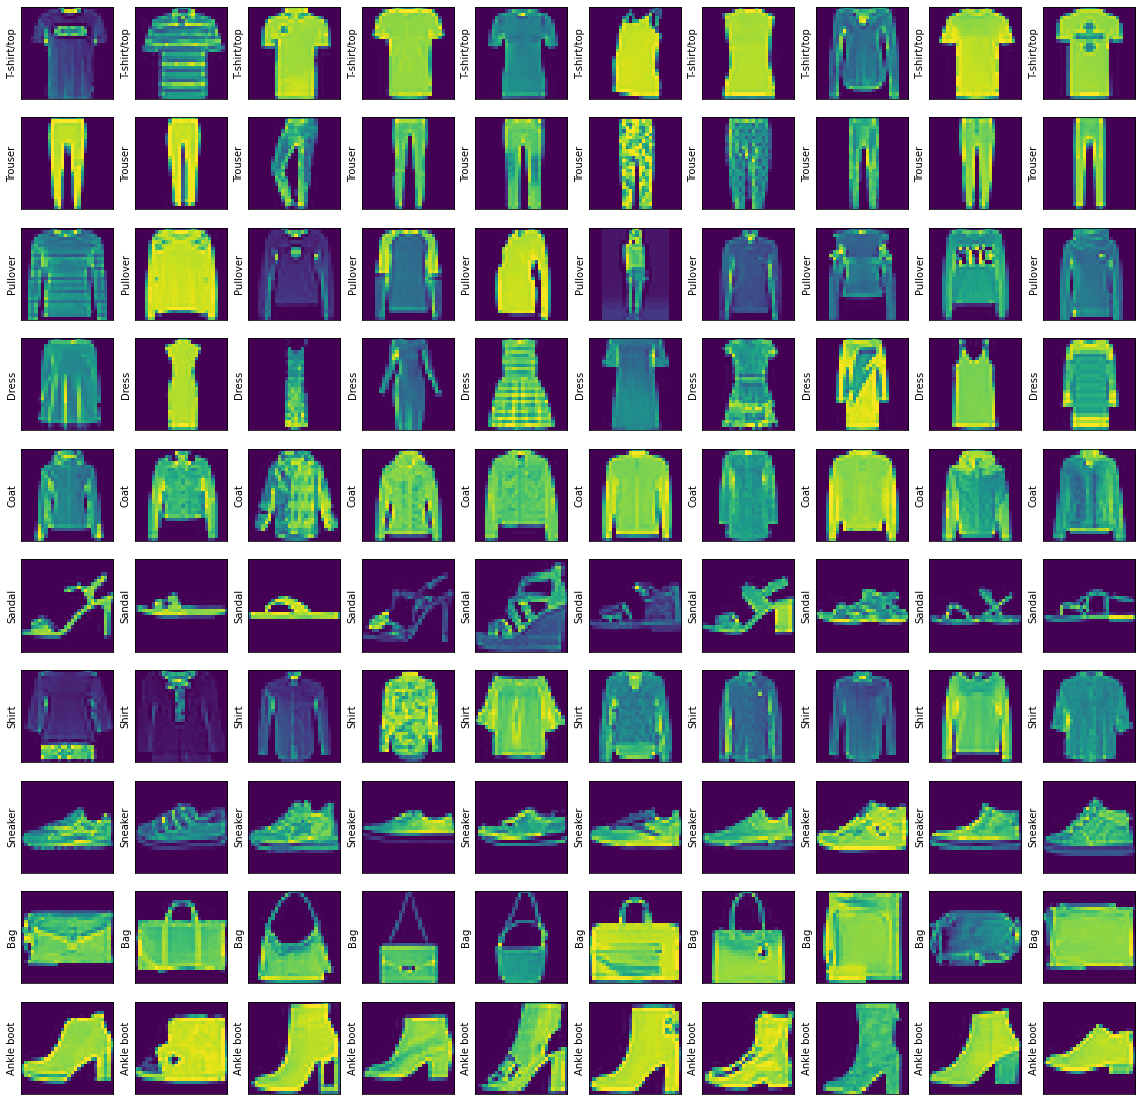

In [11]:
plt.figure(figsize=(20,20))
cell = 1
for cloth in range(10):
    count = 0
    while count < 10 :
        index = df_y[df_y == cloth].dropna().index
        plt.subplot(10,10, cell)
        ax = plt.imshow(x_train[random.choice(index)])
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        plt.ylabel(classes[cloth])
        
        cell += 1
        count += 1    

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
print("Minimum train values is :", x_train[0].min())
print("Minimum train values is :", x_train[0].max())
print("Divided by 255 to normalize image pixels")

Minimum train values is : 0
Minimum train values is : 255
Divided by 255 to normalize image pixels


In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
print("Minimum train values is :", x_train[0].min())
print("Minimum train values is :", x_train[0].max())

Minimum train values is : 0.0
Minimum train values is : 1.0


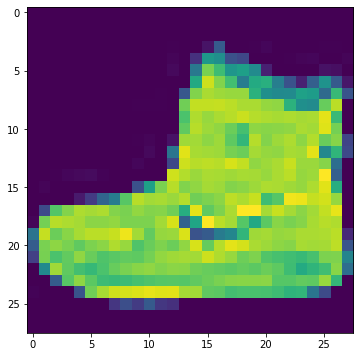

In [15]:
plt.imshow(x_train[0]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [16]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [20]:
print("before cetogorical :" , y_train[0])
print("after cetogorical :" ,Y_train[0])

before cetogorical : 9
after cetogorical : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Modeling

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

# Model 1

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.build(x_train.shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (60000, 26, 26, 28)       280       
                                                                 
 max_pooling2d_2 (MaxPooling  (60000, 25, 25, 28)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (60000, 17500)            0         
                                                                 
 dense_4 (Dense)             (60000, 128)              2240128   
                                                                 
 dense_5 (Dense)             (60000, 10)               1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
model.fit(x_train, Y_train, batch_size=32, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3885 - accuracy: 0.8648 - val_loss: 0.3216 - val_accuracy: 0.8866
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2571 - accuracy: 0.9079 - val_loss: 0.2987 - val_accuracy: 0.8959
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2130 - accuracy: 0.9236 - val_loss: 0.3069 - val_accuracy: 0.8994
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1863 - accuracy: 0.9337 - val_loss: 0.3476 - val_accuracy: 0.9012
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1610 - accuracy: 0.9425 - val_loss: 0.3305 - val_accuracy: 0.9011
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1422 - accuracy: 0.9493 - val_loss: 0.3641 - val_accuracy: 0.9021
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1290 - accuracy: 0.9552 - val_loss: 0.3900 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

,loss,accuracy,val_loss,val_accuracy
0,0.388,0.865,0.322,0.887
1,0.257,0.908,0.299,0.896
2,0.213,0.924,0.307,0.899
3,0.186,0.934,0.348,0.901
4,0.161,0.943,0.330,0.901


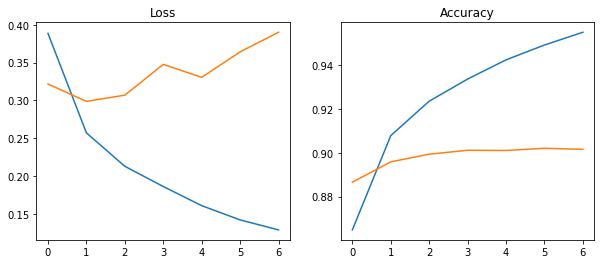

In [ ]:
summary = pd.DataFrame(model.history.history)

fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(10,4))
ax[0].plot(summary[["loss", "val_loss"]])
ax[0].set_title('Loss')

ax[1].plot(summary[["accuracy", "val_accuracy"]])
ax[1].set_title('Accuracy');
summary.head()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
model.evaluate(x_test,Y_test, verbose=0, return_dict=True)

{'loss': 0.2987358272075653, 'accuracy': 0.8959000110626221}

In [ ]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.71872739e-06, 9.00678820e-09, 2.94957552e-08, ...,
        1.86573192e-02, 2.12383857e-05, 9.79568720e-01],
       [9.06992045e-06, 7.71163529e-15, 9.99891162e-01, ...,
        3.53698157e-14, 1.17490212e-10, 8.23837594e-14],
       [2.13632347e-08, 1.00000000e+00, 1.87979875e-11, ...,
        1.05690481e-13, 2.35901132e-10, 6.46703170e-17],
       ...,
       [4.13527829e-04, 2.60552246e-10, 2.53096514e-04, ...,
        6.49249705e-05, 9.88651812e-01, 1.90355074e-08],
       [5.07359932e-09, 9.99997258e-01, 1.37143838e-11, ...,
        1.20252185e-11, 1.48691781e-10, 1.44862976e-11],
       [8.32955338e-05, 1.49984419e-06, 9.37657169e-05, ...,
        1.91011447e-02, 5.93735650e-03, 8.02044349e-04]], dtype=float32)

In [ ]:
np.argmax(pred_prob, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.91      0.77      0.83      1000
           3       0.93      0.86      0.90      1000
           4       0.77      0.93      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.68      0.78      0.73      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)
conf_matrix

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,789,1,9,12,8,1,177,0,3,0
Trouser,1,973,1,16,3,0,4,0,2,0
Pullover,16,0,768,6,111,2,97,0,0,0
Dress,15,10,8,862,68,0,35,0,2,0
Coat,0,1,23,5,925,0,46,0,0,0
Sandal,0,0,0,0,0,982,0,11,0,7
Shirt,64,0,33,19,88,0,782,0,14,0
Sneaker,0,0,0,0,0,19,0,972,0,9
Bag,4,0,0,4,4,3,4,4,977,0
Ankle boot,0,0,0,0,0,10,1,60,0,929


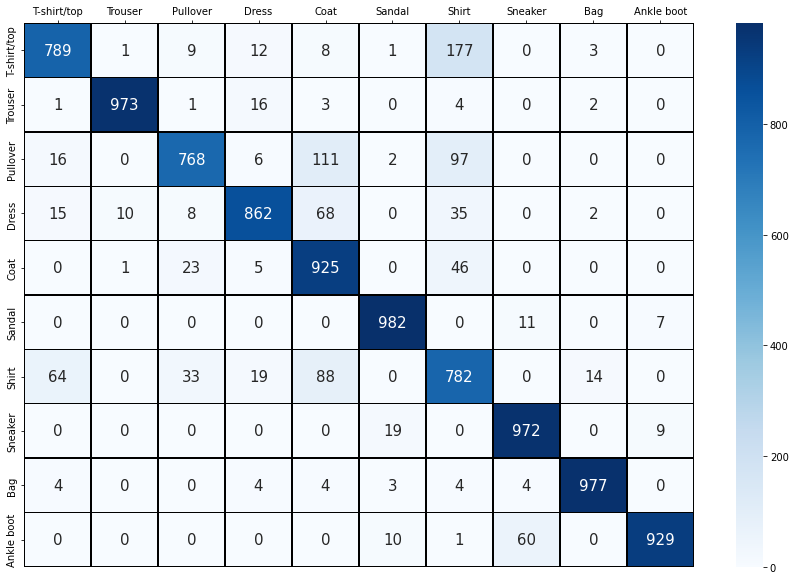

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(conf_matrix, annot=True, cmap="Blues", 
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top();

# Model 2 - more complex than model 1
- Conv2D =  64 - 32
- Dense = 256 - 128 - 10

In [59]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(x_train.shape)

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
model.fit(x_train, Y_train, batch_size=64, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 9s 8ms/step - loss: 0.3703 - accuracy: 0.8651 - val_loss: 0.2958 - val_accuracy: 0.8902
Epoch 2/50
938/938 [==============================] - 7s 8ms/step - loss: 0.2299 - accuracy: 0.9136 - val_loss: 0.2420 - val_accuracy: 0.9118
Epoch 3/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1818 - accuracy: 0.9317 - val_loss: 0.2225 - val_accuracy: 0.9195
Epoch 4/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1445 - accuracy: 0.9447 - val_loss: 0.2595 - val_accuracy: 0.9164
Epoch 5/50
938/938 [==============================] - 7s 8ms/step - loss: 0.1137 - accuracy: 0.9570 - val_loss: 0.2465 - val_accuracy: 0.9218


In [60]:
summary = pd.DataFrame(model.history.history)
score = model.evaluate(x_test, Y_test, verbose=0)

print(summary.head())
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   loss  accuracy  val_loss  val_accuracy
0 0.370     0.865     0.296         0.890
1 0.230     0.914     0.242         0.912
2 0.182     0.932     0.222         0.919
3 0.144     0.945     0.260         0.916
4 0.114     0.957     0.247         0.922
Test loss: 0.22246818244457245
Test accuracy: 0.9194999933242798


313/313 [==============================] - 1s 2ms/step


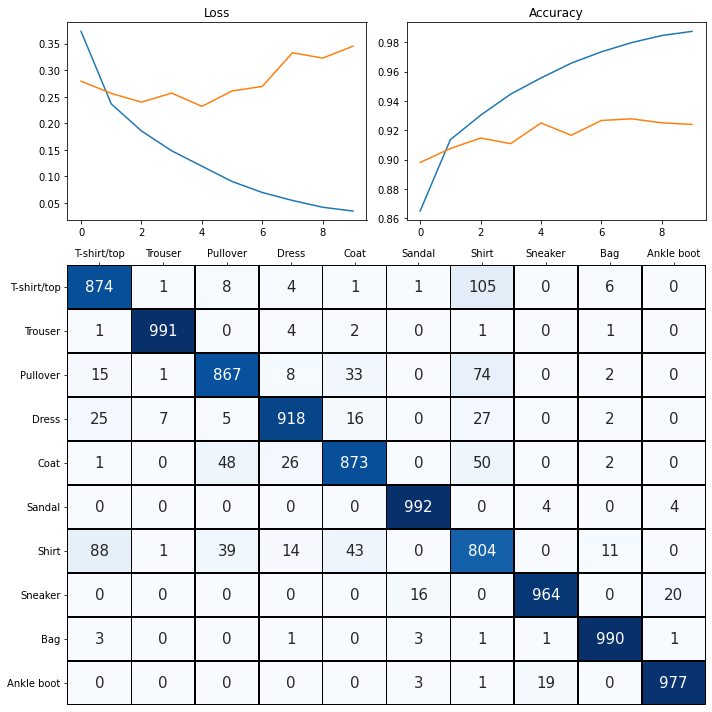

In [58]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)

fig = plt.figure(figsize=(10,10),tight_layout=True)
ax1 = plt.subplot2grid((6,4),(0,0),colspan = 2, rowspan = 2)
ax1.plot(summary[["loss", "val_loss"]])
ax1.set_title('Loss')
ax2 = plt.subplot2grid((6,4),(0,2), colspan = 2, rowspan = 2)
ax2.plot(summary[["accuracy", "val_accuracy"]])
ax2.set_title('Accuracy')
plt.subplot2grid((6,4),(2,0),rowspan = 4, colspan = 4)
ax =sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top()

# Model 3 - Change the model 2
- Conv2D =  32 - 64
- Dense = 256 - 128 - 10

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(x_train.shape)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
model.fit(x_train, Y_train, batch_size=64, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 9s 10ms/step - loss: 0.3580 - accuracy: 0.8709 - val_loss: 0.2897 - val_accuracy: 0.8987
Epoch 2/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2191 - accuracy: 0.9179 - val_loss: 0.2430 - val_accuracy: 0.9160
Epoch 3/50
938/938 [==============================] - 9s 9ms/step - loss: 0.1703 - accuracy: 0.9366 - val_loss: 0.2138 - val_accuracy: 0.9232
Epoch 4/50
938/938 [==============================] - 9s 9ms/step - loss: 0.1302 - accuracy: 0.9514 - val_loss: 0.2356 - val_accuracy: 0.9208
Epoch 5/50
938/938 [==============================] - 9s 9ms/step - loss: 0.0971 - accuracy: 0.9638 - val_loss: 0.2339 - val_accuracy: 0.9286


In [53]:
summary = pd.DataFrame(model.history.history)
score = model.evaluate(x_test, Y_test, verbose=0)

print(summary.head())
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   loss  accuracy  val_loss  val_accuracy
0 0.358     0.871     0.290         0.899
1 0.219     0.918     0.243         0.916
2 0.170     0.937     0.214         0.923
3 0.130     0.951     0.236         0.921
4 0.097     0.964     0.234         0.929
Test loss: 0.21381226181983948
Test accuracy: 0.9232000112533569


313/313 [==============================] - 1s 4ms/step


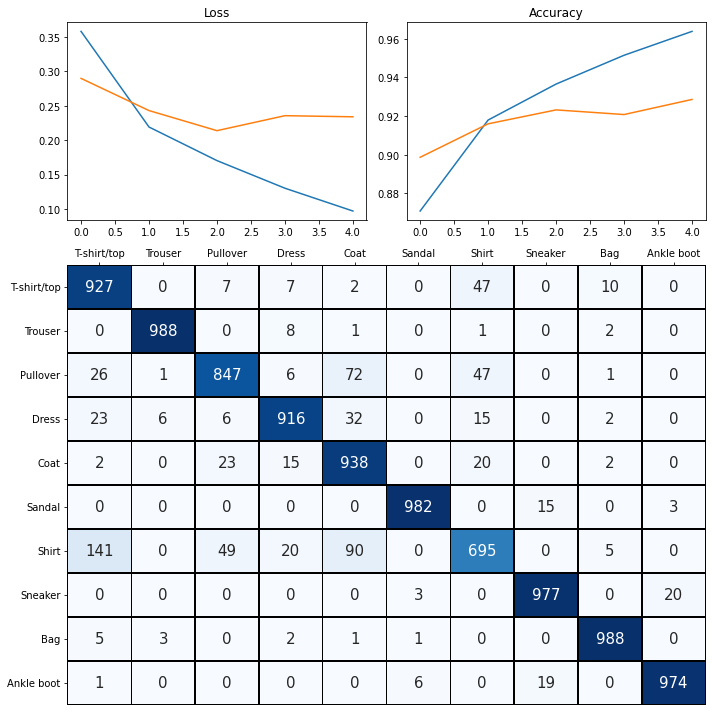

In [54]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)

fig = plt.figure(figsize=(10,10),tight_layout=True)
ax1 = plt.subplot2grid((6,4),(0,0),colspan = 2, rowspan = 2)
ax1.plot(summary[["loss", "val_loss"]])
ax1.set_title('Loss')
ax2 = plt.subplot2grid((6,4),(0,2), colspan = 2, rowspan = 2)
ax2.plot(summary[["accuracy", "val_accuracy"]])
ax2.set_title('Accuracy')
plt.subplot2grid((6,4),(2,0),rowspan = 4, colspan = 4)
ax =sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top()

# Model 4 - with Dropout
- Conv2D =  32 - 64 with Dropout
- Dense = 256 - 128 - 10 with Dropout
- Patience = 5

In [60]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(x_train.shape)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
model.fit(x_train, Y_train, batch_size=64, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 183us/sample - loss: 0.8560 - acc: 0.6925 - val_loss: 0.4822 - val_acc: 0.8335
Epoch 2/50
60000/60000 [==============================] - 10s 172us/sample - loss: 0.5029 - acc: 0.8259 - val_loss: 0.3669 - val_acc: 0.8760
Epoch 3/50
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4310 - acc: 0.8576 - val_loss: 0.3352 - val_acc: 0.8811
Epoch 4/50
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3881 - acc: 0.8718 - val_loss: 0.2937 - val_acc: 0.8967
Epoch 5/50
60000/60000 [==============================] - 13s 220us/sample - loss: 0.3672 - acc: 0.8799 - val_loss: 0.2825 - val_acc: 0.9022
Epoch 6/50
60000/60000 [==============================] - 14s 241us/sample - loss: 0.3473 - acc: 0.8864 - val_loss: 0.2769 - val_acc: 0.9092
Epoch 7/50
60000/60000 [==============================] - 15s 245us/sample - loss: 0.3352 - acc: 0.8904 

In [61]:
summary = pd.DataFrame(model.history.history)
score = model.evaluate(x_test, Y_test, verbose=0)

print(summary.head())
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   loss   acc  val_loss  val_acc
0 0.856 0.692     0.482    0.834
1 0.503 0.826     0.367    0.876
2 0.431 0.858     0.335    0.881
3 0.388 0.872     0.294    0.897
4 0.367 0.880     0.282    0.902
Test loss: 0.2270150729894638
Test accuracy: 0.92240006


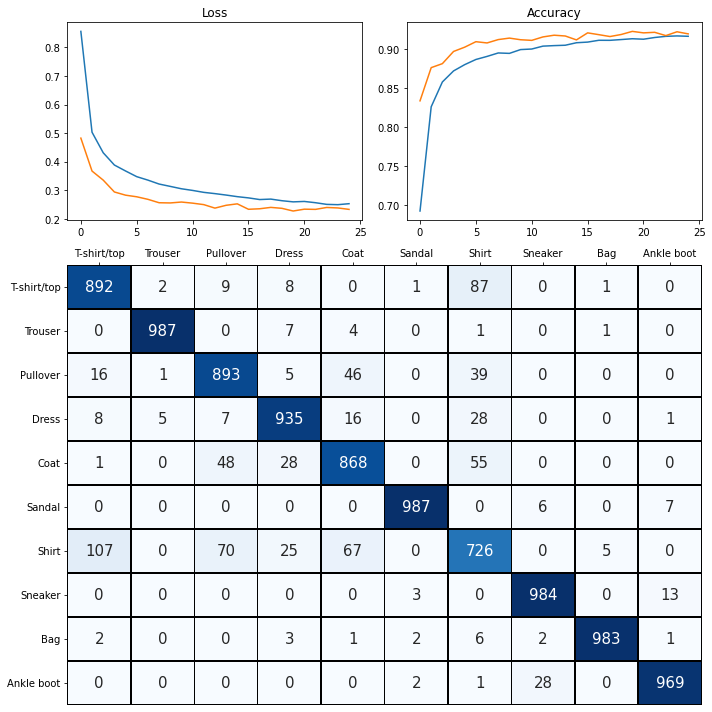

In [63]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)

fig = plt.figure(figsize=(10,10),tight_layout=True)
ax1 = plt.subplot2grid((6,4),(0,0),colspan = 2, rowspan = 2)
ax1.plot(summary[["loss", "val_loss"]])
ax1.set_title('Loss')
ax2 = plt.subplot2grid((6,4),(0,2), colspan = 2, rowspan = 2)
ax2.plot(summary[["acc", "val_acc"]])
ax2.set_title('Accuracy')
plt.subplot2grid((6,4),(2,0),rowspan = 4, colspan = 4)
ax =sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top()

# MODEL 5 -  more complex than model 4
- Conv2D = 32 - 48 - 64  with Dropout
- Dense 256 - 128 - 10 with Dropout
- Patience = 2

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(x_train.shape)
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
model.fit(x_train, Y_train, batch_size=64, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 175us/sample - loss: 0.8639 - acc: 0.6917 - val_loss: 0.4146 - val_acc: 0.8532
Epoch 2/50
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4835 - acc: 0.8412 - val_loss: 0.3262 - val_acc: 0.8902
Epoch 3/50
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4112 - acc: 0.8660 - val_loss: 0.3001 - val_acc: 0.8958
Epoch 4/50
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3651 - acc: 0.8793 - val_loss: 0.2880 - val_acc: 0.8994
Epoch 5/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3411 - acc: 0.8877 - val_loss: 0.2704 - val_acc: 0.9056: 0.
Epoch 6/50
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3217 - acc: 0.8933 - val_loss: 0.2626 - val_acc: 0.9063
Epoch 7/50
60000/60000 [

In [23]:
summary = pd.DataFrame(model.history.history)
score = model.evaluate(x_test, Y_test, verbose=0)

print(summary.head())
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   loss   acc  val_loss  val_acc
0 0.864 0.692     0.415    0.853
1 0.483 0.841     0.326    0.890
2 0.411 0.866     0.300    0.896
3 0.365 0.879     0.288    0.899
4 0.341 0.888     0.270    0.906
Test loss: 0.21557588089704513
Test accuracy: 0.92560005


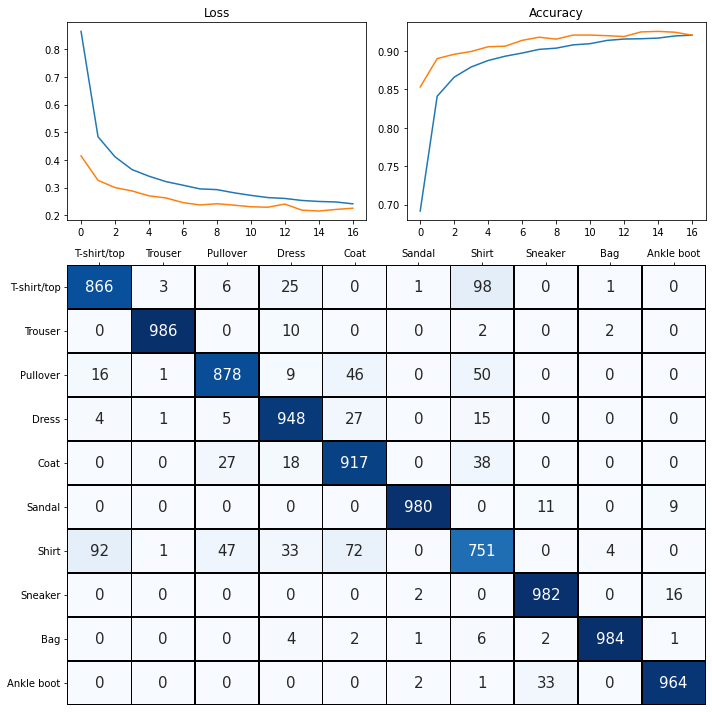

In [27]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)

fig = plt.figure(figsize=(10,10),tight_layout=True)
ax1 = plt.subplot2grid((6,4),(0,0),colspan = 2, rowspan = 2)
ax1.plot(summary[["loss", "val_loss"]])
ax1.set_title('Loss')
ax2 = plt.subplot2grid((6,4),(0,2), colspan = 2, rowspan = 2)
ax2.plot(summary[["acc", "val_acc"]])
ax2.set_title('Accuracy')
plt.subplot2grid((6,4),(2,0),rowspan = 4, colspan = 4)
ax =sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top()

# Model 6 with BatchNormalization 

- Conv2D = 48 - 48 - 64  with Dropout
- Dense 256 - 128 - 10 with Dropout
- Patience = 2
- lr = 0.003

In [86]:
# Returned the model a few times until getting a better score
model = Sequential()

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding="same"))


model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides=(1,1)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.003), metrics=['accuracy'])

model.build(x_train.shape)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
model.fit(x_train, Y_train, batch_size=128, epochs=50, validation_data=(x_test,Y_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 227us/sample - loss: 0.7069 - acc: 0.7501 - val_loss: 9.7956 - val_acc: 0.2481
Epoch 2/50
60000/60000 [==============================] - 10s 170us/sample - loss: 0.4017 - acc: 0.8658 - val_loss: 2.8138 - val_acc: 0.4819
Epoch 3/50
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3481 - acc: 0.8828 - val_loss: 0.3149 - val_acc: 0.8859
Epoch 4/50
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3085 - acc: 0.8963 - val_loss: 1.3809 - val_acc: 0.7671
Epoch 5/50
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2840 - acc: 0.9037 - val_loss: 0.2639 - val_acc: 0.9080
Epoch 6/50
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2733 - acc: 0.9083 - val_loss: 0.2685 - val_acc: 0.9084
Epoch 7/50
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2551 - acc: 0.9144 

In [87]:
summary = pd.DataFrame(model.history.history)
score = model.evaluate(x_test, Y_test, verbose=0)

print(summary.head())
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   loss   acc  val_loss  val_acc
0 0.707 0.750     9.796    0.248
1 0.402 0.866     2.814    0.482
2 0.348 0.883     0.315    0.886
3 0.309 0.896     1.381    0.767
4 0.284 0.904     0.264    0.908
Test loss: 0.20616932015269995
Test accuracy: 0.9365001


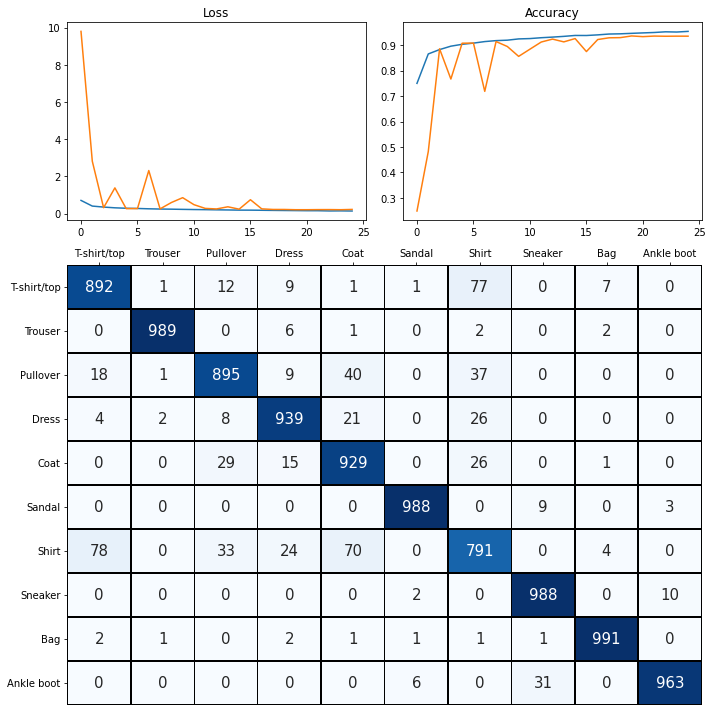

In [88]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns= classes)

fig = plt.figure(figsize=(10,10),tight_layout=True)
ax1 = plt.subplot2grid((6,4),(0,0),colspan = 2, rowspan = 2)
ax1.plot(summary[["loss", "val_loss"]])
ax1.set_title('Loss')
ax2 = plt.subplot2grid((6,4),(0,2), colspan = 2, rowspan = 2)
ax2.plot(summary[["acc", "val_acc"]])
ax2.set_title('Accuracy')
plt.subplot2grid((6,4),(2,0),rowspan = 4, colspan = 4)
ax =sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.xaxis.tick_top()

## Prediction

Shape of image is :  (28, 28, 1)
Class label is : Dress


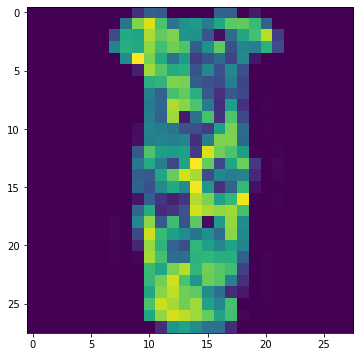

In [112]:
my_image = x_test[100]
print("Shape of image is : ", my_image.shape)
print("Class label is :", classes[y_test[100]])
plt.imshow(my_image);

In [113]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))
image_prediction

array([[5.7733298e-04, 3.2627686e-05, 9.7826283e-05, 9.9857557e-01,
        1.1769359e-04, 2.3743520e-07, 5.9560308e-04, 9.8813928e-07,
        1.8882370e-06, 2.7700233e-07]], dtype=float32)

In [118]:
np.argmax(image_prediction, axis=1)

array([3], dtype=int64)

In [120]:
print("Prediction result is :", classes[np.argmax(image_prediction, axis=1)[0]])

Prediction result is : Dress


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___